<a href="https://colab.research.google.com/github/tjbingamon/Prediction-of-Product-Sales/blob/main/Prediction_of_Product_Sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Prediction of Product Sales
 Thomas Bingamon


## Project Overview

## Load and Inspect Data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


- Import Libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
filename = ('/content/drive/MyDrive/Copy of sales_predictions.xlsx')

- Display head of data frame

In [ ]:
product_df = pd.read_excel(filename)
product_df
product_df.info()
product_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


## Clean Data

1. How many rows and columns?

In [ ]:
product_df.shape

(8523, 12)

2. What are the datatypes of each variable?




In [ ]:
product_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


3. Are there duplicates? If so, drop any duplicates.

In [ ]:
product_df.duplicated().sum()

0

4. Identify missing values.

In [ ]:
product_df.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

5. Decide on how to address the missing values and do it! (This requires your judgement, so explain your choice).

- Add a justification for method chosen in a text cell for each column addressed.

In [ ]:
median_weight = product_df['Item_Weight'].median()
product_df['Item_Weight'].fillna(median_weight, inplace=True)
product_df.isna().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

Justification: There are not enough missing values to justify dropping the column as too much data would be lost.

In [ ]:
product_df['Outlet_Size'].fillna('Unknown', inplace=True)

Justification: There are not enough missing values to justify dropping the column as too much data would be lost.

6. Confirm that there are no missing values after addressing them.

In [ ]:
product_df.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

7.  Find and fix any inconsistent categories of data (example: fix cat, Cat, and cats so that they are consistent).


In [ ]:
data_types = product_df.dtypes
object_data_types = data_types[(data_types == "object")]
object_data_types

Item_Identifier         object
Item_Fat_Content        object
Item_Type               object
Outlet_Identifier       object
Outlet_Size             object
Outlet_Location_Type    object
Outlet_Type             object
dtype: object

In [ ]:
object_data_types.index

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

In [ ]:
for column in object_data_types.index:
    print(column)
    print(product_df[column].unique())
    print('\n')

Item_Identifier
['FDA15' 'DRC01' 'FDN15' ... 'NCF55' 'NCW30' 'NCW05']


Item_Fat_Content
['Low Fat' 'Regular' 'low fat' 'LF' 'reg']


Item_Type
['Dairy' 'Soft Drinks' 'Meat' 'Fruits and Vegetables' 'Household'
 'Baking Goods' 'Snack Foods' 'Frozen Foods' 'Breakfast'
 'Health and Hygiene' 'Hard Drinks' 'Canned' 'Breads' 'Starchy Foods'
 'Others' 'Seafood']


Outlet_Identifier
['OUT049' 'OUT018' 'OUT010' 'OUT013' 'OUT027' 'OUT045' 'OUT017' 'OUT046'
 'OUT035' 'OUT019']


Outlet_Size
['Medium' 'Unknown' 'High' 'Small']


Outlet_Location_Type
['Tier 1' 'Tier 3' 'Tier 2']


Outlet_Type
['Supermarket Type1' 'Supermarket Type2' 'Grocery Store'
 'Supermarket Type3']




In [ ]:
print(product_df['Item_Fat_Content'].unique())

['Low Fat' 'Regular' 'low fat' 'LF' 'reg']


In [ ]:
product_df.replace({'low fat': 'Low Fat', 'reg': 'Regular', 'LF': 'Low Fat'}, inplace = True)

In [ ]:
product_df['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

8. For any numerical columns, obtain the summary statistics of each (min, max, mean).



In [ ]:
product_df.describe(include="number")

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.00000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.81342,0.066132,140.992782,1997.831867,2181.288914
std,4.22724,0.051598,62.275067,8.371760,1706.499616
min,4.55500,0.000000,31.290000,1985.000000,33.290000
25%,9.31000,0.026989,93.826500,1987.000000,834.247400
50%,12.60000,0.053931,143.012800,1999.000000,1794.331000
75%,16.00000,0.094585,185.643700,2004.000000,3101.296400
max,21.35000,0.328391,266.888400,2009.000000,13086.964800


## Exploratory Data Analysis

Histogram to view the distributions of various features in your dataset.

Text(0, 0.5, 'Item_MRP')

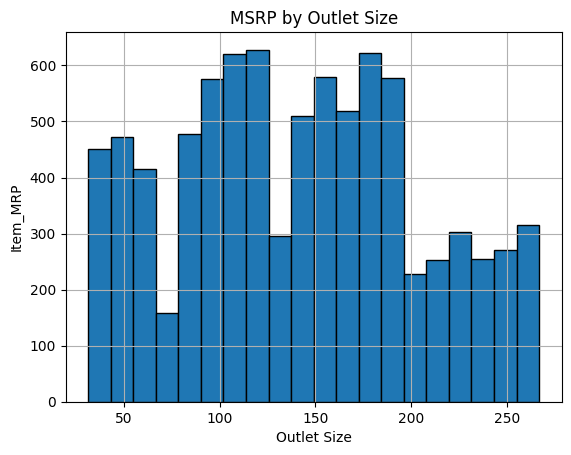

In [ ]:
ax = product_df['Item_MRP'].hist(bins = 20, edgecolor = 'black')
ax.tick_params(axis='x', rotation = 0)
ax.ticklabel_format(style='plain')
ax.set_title('MSRP by Outlet Size')
ax.set_xlabel('Outlet Size')
ax.set_ylabel('Item_MRP')

Boxplot to view statistical summaries of various features in your dataset.

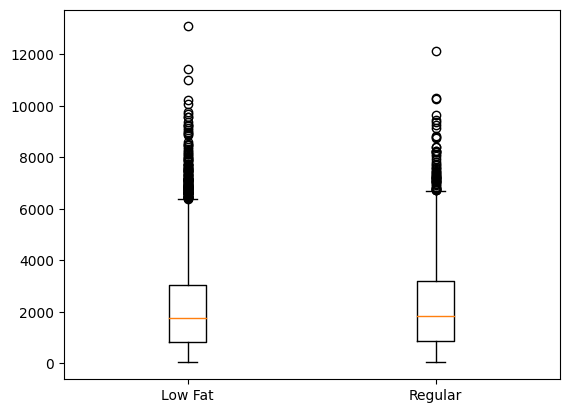

In [ ]:
lf =  product_df.loc[product_df['Item_Fat_Content']=='Low Fat','Item_Outlet_Sales']
rg =  product_df.loc[product_df['Item_Fat_Content']=='Regular','Item_Outlet_Sales']
fig, ax = plt.subplots()
ax.boxplot([lf,rg], labels=['Low Fat', 'Regular']);


Heatmap of the correlation between features

<Axes: >

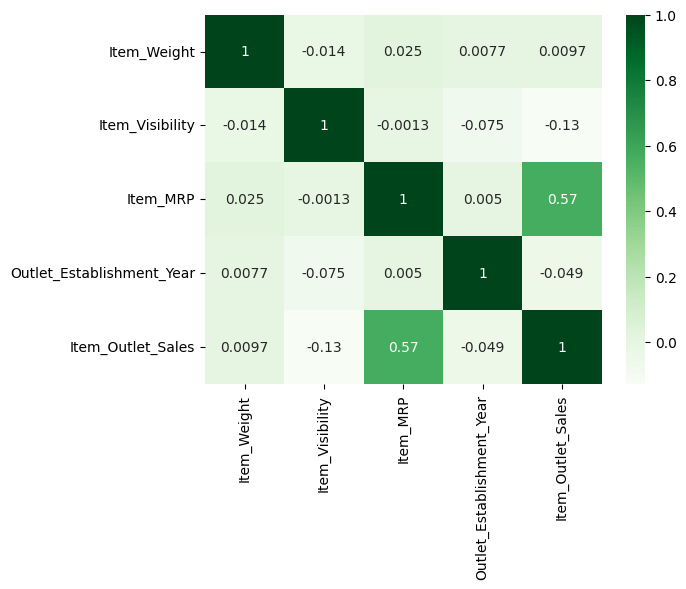

In [ ]:
corr= product_df.corr()

sns.heatmap(corr, cmap = 'Greens', annot = True)

## Explanatory Data Analysis

Matplot "Item Visibility" vs "Item Outlet Sales"

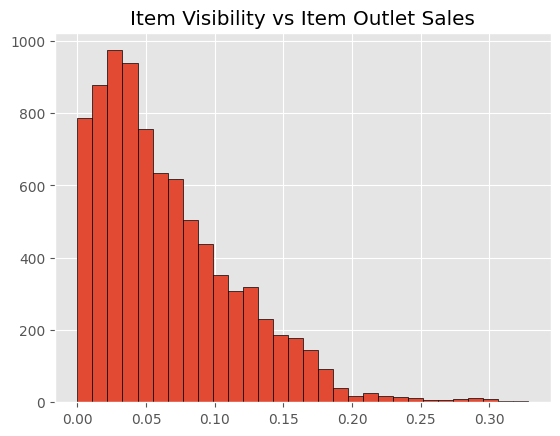

In [ ]:
with plt.style.context('ggplot'):
    # any plots created in this block will use the style
    ax = product_df['Item_Visibility'].hist(bins = 30, edgecolor='black')
    ax.tick_params(axis='x', rotation = 0)
    ax.ticklabel_format(style='plain')
    ax.set_title('Item Visibility vs Item Outlet Sales')

Scatterplot of Outlet Sales vs Item Visability by Fat Content

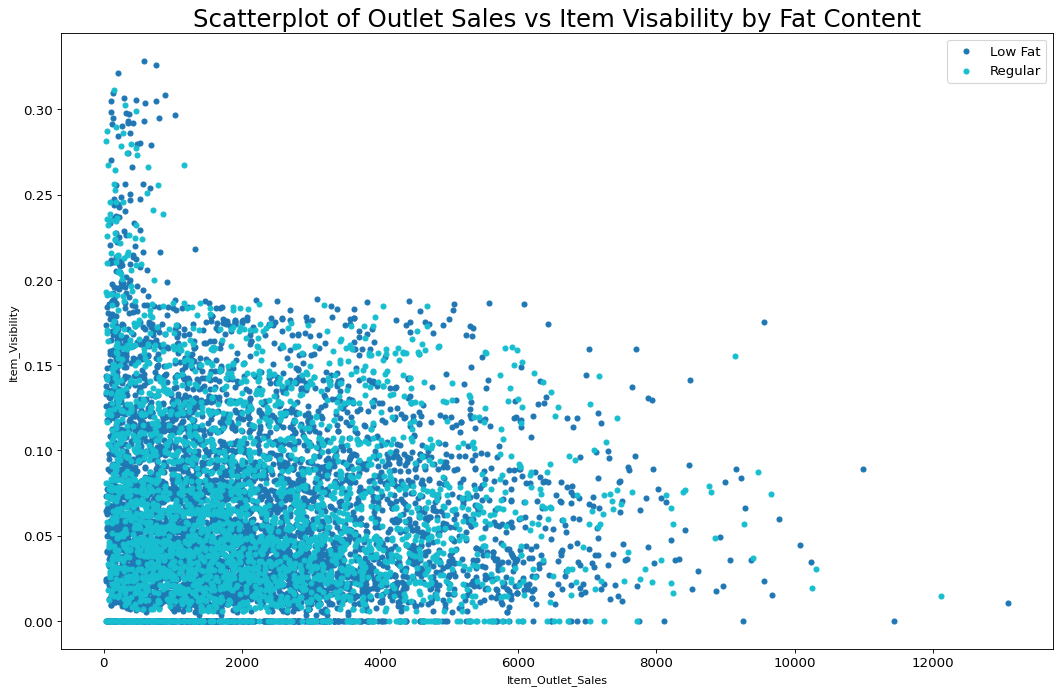

In [ ]:
pdf = product_df
categories = np.unique(pdf['Item_Fat_Content'])
colors = [plt.cm.tab10(i/float(len(categories)-1)) for i in range(len(categories))]

# Draw Plot for Each Category
plt.figure(figsize=(16, 10), dpi= 80, facecolor='w', edgecolor='k')

for i, Item_Fat_Content in enumerate(categories):
    plt.scatter('Item_Outlet_Sales', 'Item_Visibility', 
                data=pdf.loc[pdf.Item_Fat_Content==Item_Fat_Content, :], 
                s=20, c=colors[i], label=str(Item_Fat_Content))

# Decorations
plt.gca().set(xlabel='Item_Outlet_Sales', ylabel='Item_Visibility')

plt.xticks(fontsize=12); plt.yticks(fontsize=12)
plt.title("Scatterplot of Outlet Sales vs Item Visability by Fat Content", fontsize=22)
plt.legend(fontsize=12)    
plt.show()    